#### 로지스택회귀
```
공부한시간 데이터를 보고 합격여부를 예측
공부시간에 비례해서 점수를 부여
공부1시간에 10점을 부여
--> 선형 방정식
합격점수(z) = w*(공부시간) + b
w(가중치) : 중요도 1시간당 점수(10점)
b(편향) : 기본점수(-50, 5시간은 공부해야 0점)

문제점 : 합격점수에 해당하는 100점이 나올수도 있지만 -200점이 나올수도있음...
분류를 하려면 즉 합격 불합격판단... 우리가 원하는 것은 방정식의 값으로 확률을 계산(0 ~ 100%)
```
#### 점수를 확률로 바꿔야한다. (시그모이드 함수) 0 ~ 1사이의 값으로 변경
```
합격확률 = 시그모이드(z) = 1 / 1 + e^-z
합격점수가 높으면 1에 가깝고
낮으면 0에 가깝다.
합격점수가 0이면 정확히 0.5(50%) - 임계값
```
#### 비용함수(손실함수) : 모델이 얼마나  틀렸는지 측정   로지스틱은 로그함수를사용
```
합격(정답 = 1)
모델이 99% 합격예측 ==> 벌점 거의 0점
모델이 1% 합격예측 ==> 벌점은 크게(무한대에 가깝게)

불합격(정답 = 0)
모델이 1%로 합격을 예측 -> 잘 맞춤 벌점이 거의 0점
모델이 99%로 합격을 예측 -> 완전 틀림 벌점을 아주 크게

log loss 원리
w, b를 찾음... 손실함수를 이용해서 비용이 가장 낮을때
```
#### 비용이 최저인 값을 찾아나가는 과정 : 경사하강법

#### 너무 완벽한 모델..(학습에 대해서)
```
규제(Regularization) 모델이 너무 복잡해 지지 않도록 패널티 또는 단순함에 대한 보너스
L2규제(Ridge) : w(중요도)값이 너무 커지는 것을 막는다. 가중치(w) 제곱의  합을 벌점으로 추가
L1규제(Lasso) : 어떤 특징이 별로 중요하지 않을 것 같은... 그냥 w(중요도)를 0으로 만든다. 불필요한 특징을 제거하는 효과. 가중치들의 절대값의 합을 패널티로 추가 - feature selecter 역할도 겸함
```

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clr = LogisticRegression()
clr.fit(X_train, y_train)
predict = clr.predict(X_test)
print(predict[:5], y_test[:5])
predict_proba = clr.predict_proba(X_test)
predict_proba[:5]



[1 0 0 1 1] [1 0 0 1 1]


array([[1.19778127e-01, 8.80221873e-01],
       [9.99999998e-01, 1.68815067e-09],
       [9.97674881e-01, 2.32511946e-03],
       [2.81211727e-03, 9.97187883e-01],
       [7.35800632e-04, 9.99264199e-01]])

In [8]:
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# --- 시각화 함수 (공통) ---
def plot_decision_boundary(model, X_orig, y_orig, poly_transformer, scaler_transformer, title, subplot_ax):
    """모델의 결정 경계를 그려주는 함수"""
    # 1. 그래프를 그릴 영역을 정의합니다.
    x_min, x_max = X_orig[:, 0].min() - 0.5, X_orig[:, 0].max() + 0.5
    y_min, y_max = X_orig[:, 1].min() - 0.5, X_orig[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # 2. 그래프 영역의 모든 점들을 모델이 예측할 수 있도록 변환합니다.
    grid_poly = poly_transformer.transform(np.c_[xx.ravel(), yy.ravel()])
    grid_scaled = scaler_transformer.transform(grid_poly)

    # 3. 변환된 점들을 모델로 예측합니다.
    Z = model.predict(grid_scaled)
    Z = Z.reshape(xx.shape)

    # 4. 결정 경계와 원본 데이터 포인트를 그립니다.
    subplot_ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    subplot_ax.scatter(X_orig[:, 0], X_orig[:, 1], c=y_orig, cmap=plt.cm.coolwarm, edgecolors='k')
    subplot_ax.set_title(title)
    subplot_ax.set_xlabel("Feature 1")
    subplot_ax.set_ylabel("Feature 2")

In [10]:
# 과적합을 임의로 만들어서 시각화...
# 1. 규제 알고리즘을 적용 --> 
# 2. 모델을 경량화.. 모델의  복잡도를 높이는 요소를 제거...
# 3. 추가 데이터를 투입해서 학습


In [25]:
# 과적합 모델
X_small, y_small = make_moons(n_samples=50, noise=0.25, random_state=45)
# 고차항 특성으로 변환(과적합 유도)
poly = PolynomialFeatures(degree=10, include_bias=False)
X_poly_small = poly.fit_transform(X_small)
# 데이터 스케일링
scaler = StandardScaler()
X_scaled_small = scaler.fit_transform(X_poly_small)
# 모델 훈련
log_reg_overfit = LogisticRegression(C=1000, max_iter=10000) # C가 규제강도. 클수록 규제를 약하게  max_iter는 최대 반복횟수
log_reg_overfit.fit(X_scaled_small, y_small)

# 규제 적용(데이터 50, 강한 규제)
log_reg_regulation = LogisticRegression(C=0.1, max_iter=1000)
log_reg_regulation.fit(X_scaled_small, y_small)

# 데이터를 추가(데이터 500, 약한 규제)
X_large, y_large = make_moons(n_samples=500, noise=0.25, random_state=45)
X_poly_large = poly.fit_transform(X_large)
X_scaled_large = scaler.fit_transform(X_poly_large)
log_reg_moredata = LogisticRegression(C=0.1, max_iter=1000)
log_reg_moredata.fit(X_scaled_large, y_large)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.1
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


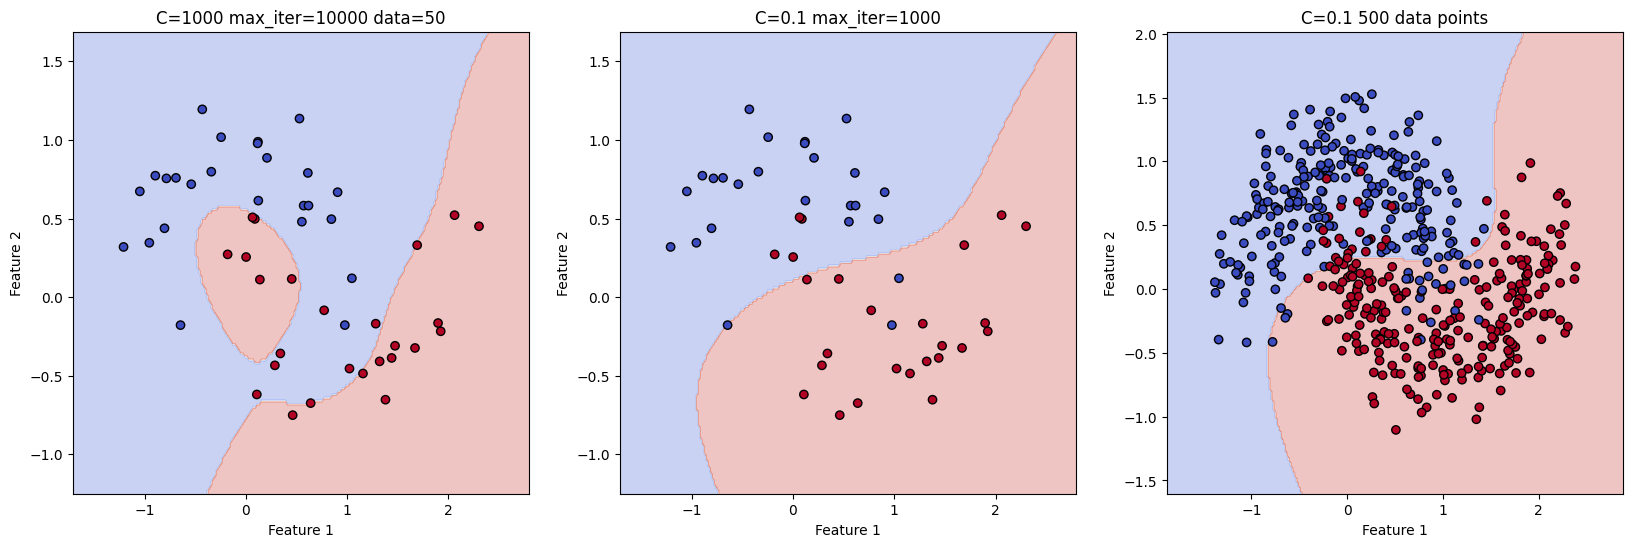

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
plot_decision_boundary(log_reg_overfit, X_small, y_small, poly, scaler, "C=1000 max_iter=10000 data=50", axes[0])
plot_decision_boundary(log_reg_regulation, X_small, y_small, poly, scaler, "C=0.1 max_iter=1000", axes[1])
plot_decision_boundary(log_reg_moredata, X_large, y_large, poly, scaler, "C=0.1 500 data points", axes[2])

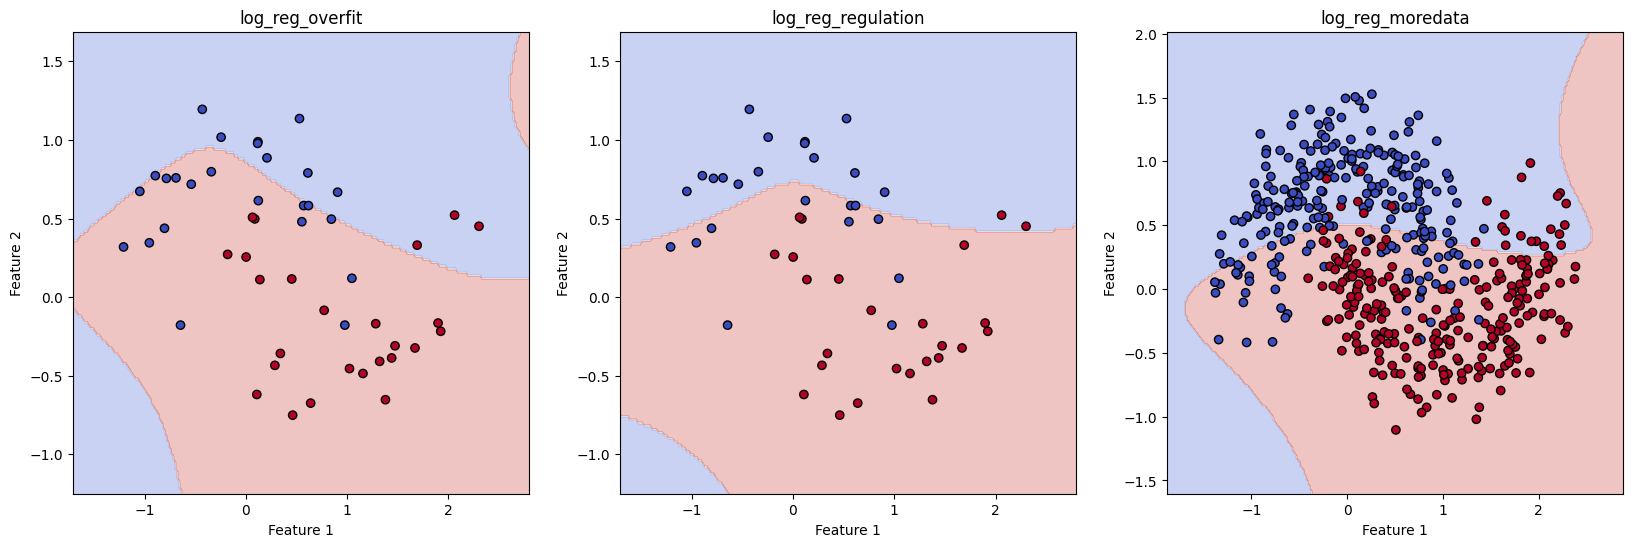

In [49]:
# pipeline으로 구현
from sklearn.pipeline import Pipeline

model = [
    ('log_reg_overfit', Pipeline([
        ('scaler', StandardScaler()),
        ('log_reg', LogisticRegression(C=1000, max_iter=10000))
    ])),
    ('log_reg_regulation', Pipeline([
        ('scaler', StandardScaler()),
        ('log_reg', LogisticRegression(C=0.1, max_iter=1000))
    ])),
    ('log_reg_moredata', Pipeline([
        ('scaler', StandardScaler()),
        ('log_reg', LogisticRegression(C=0.1, max_iter=1000))
    ]))
]

# 각 모델에 맞는 데이터 생성 파라미터
data_params = {
    'log_reg_overfit': dict(n_samples=50, noise=0.25, random_state=45),
    'log_reg_regulation': dict(n_samples=50, noise=0.25, random_state=45),
    'log_reg_moredata': dict(n_samples=500, noise=0.25, random_state=45),
}

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
for index, (name, pipe) in enumerate(model):
    poly = PolynomialFeatures(degree=10, include_bias=False)
    X_orig, y_orig = make_moons(**data_params[name])
    X_poly = poly.fit_transform(X_orig)
    pipe.fit(X_poly, y_orig)

    plot_decision_boundary(pipe, X_orig, y_orig, poly, scaler, name, axes[index])


#### ROC, AUC
```
정확도 99% 하지만... 데이터가 불균형이라면 좋은 척도가 못된다 ROC AUC 얼마나 안정적으로 좋은 성능을 내는지를 종합적으로 시각화
모델이 예측한 확률을 기반으로 분류기준점(Threshold)을 계속 변경해서 모델의 성능이 어떻게 변화하는지 하나의 곡선으로 
```
#### ROC 구성요소 TPR FPR
```
혼동행렬 (p : 1  n : 0)  p: 암환자 n : 정상
TP : 진짜 암인 환자를 암이라고 예측 - 정답
FN : 진짜 암인 환자를 정상으로 예측 - 놓친 암환자
FP : 정상인 사람을 암이라고 예측 - 잘못된 예측
TN : 정상인 사람을 정상 - 정답

ROC 곡선의 x와 y축
y축 : 진짜를 얼마나 잘 찾았나 TPR(True Positive  Rate) 실제 양성인 데이터 중에서 모델이 양성으로 올바르게 예측한 비율
TRP : 민감도 또는 재현율
실제로 암인데 암이라고 예측 / 실제 모든 암 환자수
TP / TP + FN

x축 : 가짜를 얼마나 잘못찾았냐.. FPR 
FPR = FP(정상인데 암이라고 예측) / FP + TN (실제 모든 정상인수)
```

#### AUC (Area Under The Curve)
```
ROC  곡선 아래의 면적
1 : 완벽한 모델 ROC가 좌측상단에 붙어있는 모양
0.5 : 무작위로 찍는것과 같은.. 즉.. 랜덤하게 예측하는 수준 ROC  대각선 직선
< 0.5 : 예측을 반대로.. 잘못된 모델
```

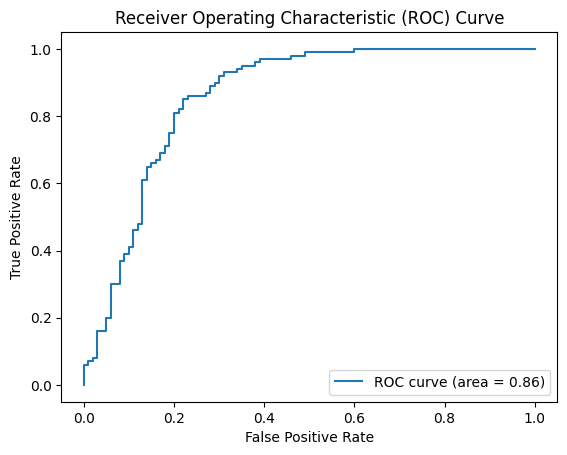

              precision    recall  f1-score   support

           0       0.81      0.80      0.80       100
           1       0.80      0.81      0.81       100

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.80       200
weighted avg       0.81      0.81      0.80       200



In [57]:
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=1000, n_features=20, n_informative=5, n_redundant=0, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)[:,1] # 양성 클래스(1)의 예측 확률

# ROC  AUC
# 실제값과 예측 확률을 사용 FPR TPR
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc =  auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print(classification_report(y_test, model.predict(X_test)))
